# Quantum computing 

### What is Quantum computing

When it comes to modern physics, quantum theory is the main theory that explains how matter and energy work at the atomic and subatomic level. At that level, things like quantum physics and quantum mechanics are used to talk about how things like matter and energy work and what they look like.
So what does quantum computing have to do with quantum theory? Well Quantum computing is a branch of computing that tries to make computer technology operate by implements the theories from quantum theory. With classical computering, which are the majority of computer that we are using today, can only encode information in bits that take the value of 1 or 0. Whereas with quantum computing you use things called "quantum bits," or "qubits." It takes advantage of the unique ability of subatomic particles to be in more than one state at the same time (i.e., a 1 and a 0 at the same time)

### Quantum computing vs Classical computing

1. Quantum computing is reported to be about a 100 million times faster than any classical computer. Google announced in 2019 that its Sycamore quantum computer had completed a task that a classical computer would have taken 10,000 years to complete in 200 seconds.
2. The use of quantum tunneling  in  quantum computers reduces power consumption from about 100 up to 1000 times more than classical computing
3. Classical and quantum computers both uses binary code to store data. Classical computers store data in bits as either a 1 or 0, whereas quantum computers store data in qubits as a1, a0, or both simultaneously
4. For everyday tasks, classical computers are the best option. Quantum computers, on the other hand, are ideal for running simulations and data analyses, such as in drug or chemical trials.
5. Quantum computing power grows exponentially as the number of qubits linked together grows. Meanwhile, with classical computing connecting more transistors increases power in a linear fashion.





# The Deutsch-Jozsa algorithm 

The Deutsch-Jozsa problem was created to test two algorithm, one was the Deutsch-Jozsa algorithm and the other was the "best classical algorithm". The Deutsch-Jozsa algoritm was the first quantum algorithm to outperform the classical algorithm. It demonstrated that using a quantum computer can be more beneficial for certain task. Down below I compare the 2 algorithm, with brief explanations. To read more about the deutsch algorithm [click here](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html).

f({x0,x1,x2,...}) → 0 or 1, where xn is 0 or 1

## The Deutsch-Jozsa Problem 

The Deutsch-Jozsa problem is defined as follows. Consider a function f(x), that takes as input n-bit strings  and returns 0 or 1. Suppose we are promised that f(x) is either a constant function that takes the same value C £ {0,1} on all inputs X, or a balanced function that takes each value  0 and 1 on exactly half of the inputs. The goal is to decide whether f is constant or balanced by making as few function evaluations as possible. 



### Classical computing solution

Lets look at a solution using a classical computing approach. We are told the number is either balanced (so half of the result will be 1 and the other half 0), or constant (the result will all be 1 or 0). So for us to check whether the result is balance/constant we have to get the firsgt half of the result then the following following result after that. Example we have a 6 bit string. The total number of results would be 2<sup>6</sup> = 64. Lets say we check the first 32 results and they are all 0. We still need to check the 33th result, if it's 0 then it would be right to assume that the remaining result are all 0 since more then half of the results equal 0 (making this constant). If the result is 1 then its right to assume that the remaing results will all be 1 and the function is balance (making it balance). So with the classical approach we have to check the 1st half plus 1 number of the results, if we get the same result each time for the 1st half. 


### Quantum computing solution using Qiskit


#### Algorithm

1. Import packages
2. Initialize registers for constant, balance, and target
3. Create circuit for constant oracle
4. Create circuit for balance oracle
5. Initialize two quantum registers. The first register contains n number of qubits, initialize them by |0> The second has only one qubit initialized it by |1>
6. Apply Hadamard gates to each qubit in both registers


##### Implementing constant oracle
7. Pass it through the constant quantum oracle (constant oracle)
8. Apply the Hadamard gate to each qubit in the first register.
9. Measure qubit in first register

##### Implementing balance oracle
10. Use circuit from step 6 and skip step 7 - 9
11. Pass it through the constant quantum oracle (balance oracle)
12. Apply the Hadamard gate to each qubit in the first register.
13. Measure qubit in first register
14. Run simulations


<!--
2. Initialize two quantum registers. The first register contains n number of qubits, initialize them by |0> The second has only one qubit initialized it by |1>
3. .

 .
4. Pass it through the quantum oracle (the black box function).
5. Apply the Hadamard gate to each qubit in the first register.
6. Measure each qubit in the first register, thus measuring the overall quantum state.
7. If we measure the state |00…0>, we know it is constant. If we measure anything else, we know it is balanced. -->



In [1]:
#1 import packages
import numpy as np
import qiskit
from qiskit import IBMQ, Aer,QuantumRegister

from qiskit.visualization import plot_histogram
import qiskit.providers.aer as aer


In [2]:
#2 Creating register

Qbit = "100" #Examplar number of bit in string
num_Qbit = len(Qbit)

register_Const = QuantumRegister(num_Qbit)
register_bal = QuantumRegister(num_Qbit)
register_target = QuantumRegister(1)



In [3]:
#3 Creating circuit for const oracle
# creating circuit

#const_oracle for func that equals 0 
const_oracle_1 = qiskit.QuantumCircuit(register_Const, register_target)
const_oracle_1.x(num_Qbit) #Draws x


#const_oracle for func that equals 1
const_oracle_2 = qiskit.QuantumCircuit(register_Const, register_target)
const_oracle_2.i(num_Qbit) #Draws I

#const_oracle_1.draw() #Draw


In [4]:
const_oracle_2.draw()

q0_0: ─────
           
q0_1: ─────
           
q0_2: ─────
      ┌───┐
  q2: ┤ I ├
      └───┘

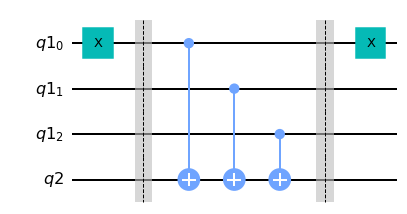

In [5]:
#4 Creating circuit for bal oracle 
bal_oracle = qiskit.QuantumCircuit(register_bal, register_target)

Qbit = "100"
num_Qbit = len(Qbit)


# Place X-gates
for qubit in range(num_Qbit):
    if Qbit[qubit] == '1':
        bal_oracle.x(qubit)
        
bal_oracle.barrier()

for qubit in range(num_Qbit):
    bal_oracle.cx(qubit, num_Qbit)

bal_oracle.barrier()

for qubit in range(num_Qbit):
    if Qbit[qubit] == '1':
        bal_oracle.x(qubit)
        

bal_oracle.draw(output = "mpl")

In [6]:
#5. Initialize two quantum registers.

import pylatexenc

Qbit = "100"
num_Qbit = len(Qbit)

register_input = QuantumRegister(num_Qbit, "q3")
register_output = QuantumRegister(1, "q4")
cr = qiskit.ClassicalRegister(num_Qbit, 'c')


circuit = qiskit.QuantumCircuit(register_input, register_output, cr)

for x in range (num_Qbit):
    circuit.initialize([1,0], x)

circuit.initialize([0,1],num_Qbit )
#circuit.draw(output = "mpl")


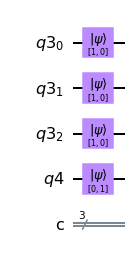

In [7]:
circuit.draw(output = "mpl")

In [8]:
#6 Apply Hadamard gates to each qubit in both registers
for x in range (num_Qbit):
    circuit.h(x)

#Applying to 2nd register
circuit.h(num_Qbit)


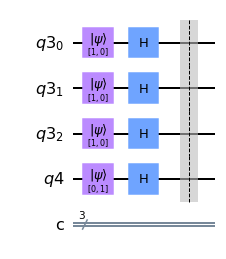

In [9]:
circuit.barrier()
circuit.draw(output='mpl')


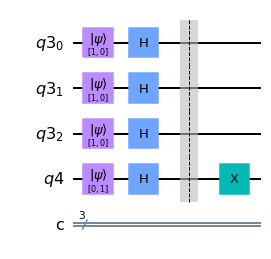

In [10]:
# 7. Pass it through the constant quantum oracle if result = 0 

resultingCircuit0 = circuit.compose(const_oracle_1)

resultingCircuit0.draw(output = "mpl")


In [11]:
#8 Apply the Hadamard gate to each qubit in the first register.

for x in range (num_Qbit):
    resultingCircuit0.h(x)

resultingCircuit0.barrier()

resultingCircuit0.draw()


┌─────────────────┐┌───┐ ░ ┌───┐ ░ 
q3_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░─
      ├─────────────────┤├───┤ ░ ├───┤ ░ 
q3_1: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░─
      ├─────────────────┤├───┤ ░ ├───┤ ░ 
q3_2: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░─
      ├─────────────────┤├───┤ ░ ├───┤ ░ 
  q4: ┤ Initialize(0,1) ├┤ H ├─░─┤ X ├─░─
      └─────────────────┘└───┘ ░ └───┘ ░ 
 c: 3/═══════════════════════════════════

In [12]:
print(register_input[1])
print('Qubit ordering:', resultingCircuit0.qubits)

Qubit(QuantumRegister(3, 'q3'), 1)
Qubit ordering: [Qubit(QuantumRegister(3, 'q3'), 0), Qubit(QuantumRegister(3, 'q3'), 1), Qubit(QuantumRegister(3, 'q3'), 2), Qubit(QuantumRegister(1, 'q4'), 0)]


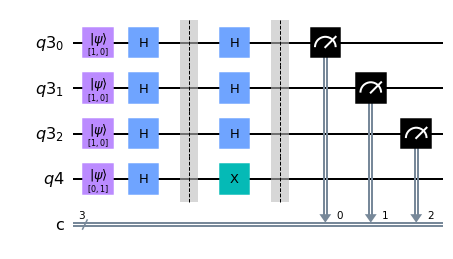

In [13]:
#9 Measurement

for x in range(num_Qbit):
    resultingCircuit0.measure(x,x)


resultingCircuit0.draw(output = "mpl")

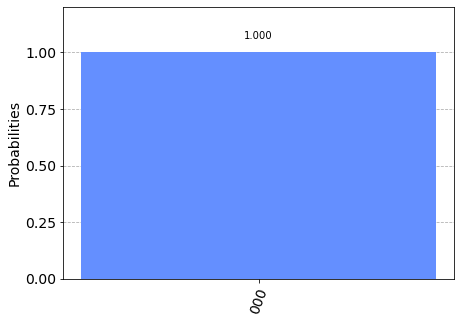

In [14]:
# Running user local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = qiskit.transpile(resultingCircuit0, aer_sim)

results = aer_sim.run(qobj, shots=50).result()
answer = results.get_counts()

plot_histogram(answer)

In [15]:
#Repeating step 7 -9 for Constant
resultingCircuit1 = circuit.compose(const_oracle_2)



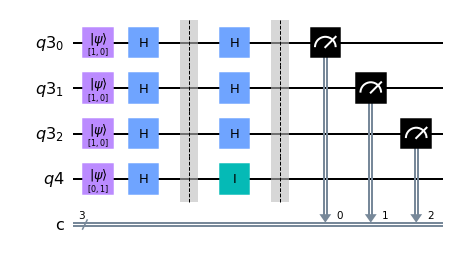

In [16]:


for x in range (num_Qbit):
    resultingCircuit1.h(x)

resultingCircuit1.barrier()


for x in range(num_Qbit):
    resultingCircuit1.measure(x,x)


resultingCircuit1.draw(output = "mpl")


In [17]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(resultingCircuit1, simulator)

compcircuit.draw()


┌─────────────────┐┌───┐ ░ ┌───┐ ░ ┌─┐      
q3_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░─┤M├──────
      ├─────────────────┤├───┤ ░ ├───┤ ░ └╥┘┌─┐   
q3_1: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░──╫─┤M├───
      ├─────────────────┤├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐
q3_2: ┤ Initialize(1,0) ├┤ H ├─░─┤ H ├─░──╫──╫─┤M├
      ├─────────────────┤├───┤ ░ └───┘ ░  ║  ║ └╥┘
  q4: ┤ Initialize(0,1) ├┤ H ├─░───────░──╫──╫──╫─
      └─────────────────┘└───┘ ░       ░  ║  ║  ║ 
 c: 3/════════════════════════════════════╩══╩══╩═
                                          0  1  2

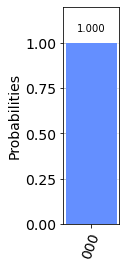

In [18]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

In [19]:
#11
#Combine circuit from step 6 with balance oracle
resultingCircuit0 = circuit.compose(bal_oracle)




In [ ]:
#12 Apply the Hadamard gate to each qubit in the first register.

# Repeat H-gates
for qubit in range(num_Qbit):
    resultingCircuit0.h(qubit)
resultingCircuit0.barrier()

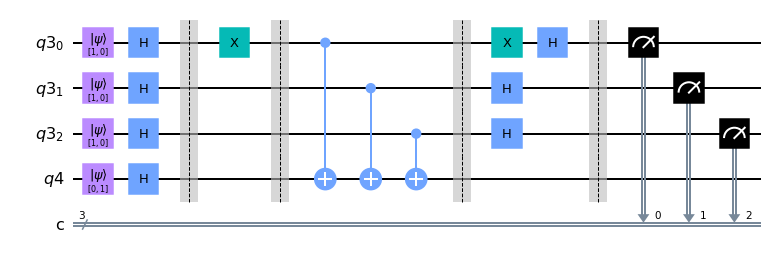

In [20]:
#13. Measure qubit in first register
# Measure
for i in range(num_Qbit):
    resultingCircuit0.measure(i, i)

resultingCircuit0.draw(output = "mpl")

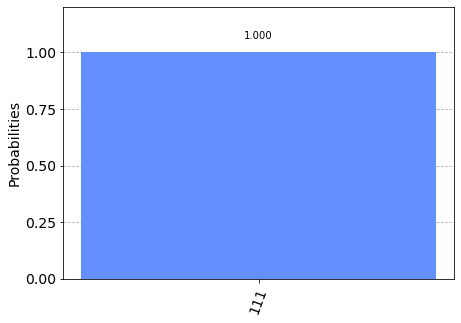

In [21]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = qiskit.assemble(resultingCircuit0, aer_sim)
results = aer_sim.run(qobj, shots=50).result()
answer = results.get_counts()

plot_histogram(answer)

# Using IBMQ Simularor with my balance circuit

In [22]:
# Account already saved, just need to load
IBMQ.save_account("8abdbd61569475ed30baf9fcb95620677ecf19740b06af15d56bf203c5a51b4550028a560c8c26c8d42230b5496b1b36be2f2bcbac953e0e0e9793a6950591f2")

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
# setting up IBMQ simulator

from qiskit.tools.monitor import job_monitor

provider = IBMQ.get_provider("ibm-q")

backend = provider.get_backend("ibmq_manila")
job = qiskit.execute(resultingCircuit0, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


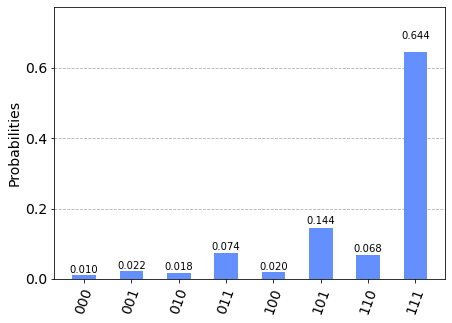

In [26]:
#Histogram data produces

result = job.result()
counts = result.get_counts(resultingCircuit0)

plot_histogram([counts])